In [29]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np

In [16]:
# Loading dataset
iris = load_iris()
X = iris.data
y = iris.target

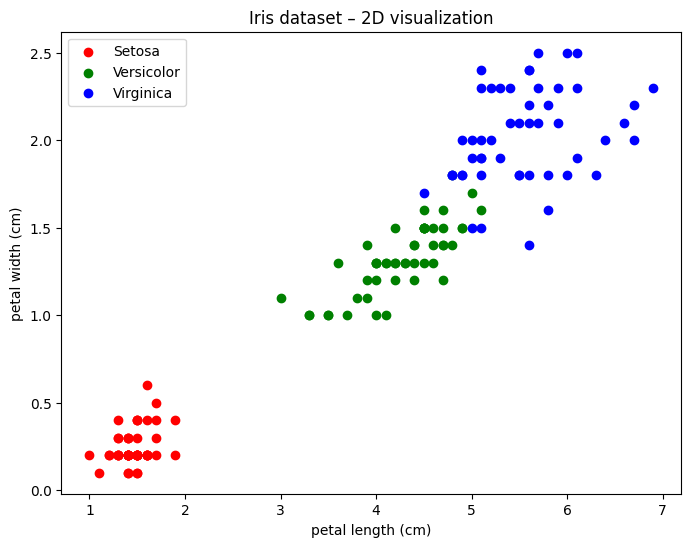

In [ ]:
# Visualize dataset
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0, 2], X[y == 0, 3], color='red', label='Setosa')
plt.scatter(X[y == 1, 2], X[y == 1, 3], color='green', label='Versicolor')
plt.scatter(X[y == 2, 2], X[y == 2, 3], color='blue', label='Virginica')

plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
plt.legend()
plt.title('Iris dataset – 2D visualization')
plt.show()

In [ ]:
# Splitting to training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [25]:
# Create and train model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,200
,multi_class,'deprecated'


In [32]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Přesnost modelu: {accuracy:.2f}")

Přesnost modelu: 1.00


In [33]:
y_train_onehot = np.eye(3)[y_train]
y_test_onehot = np.eye(3)[y_test]

In [39]:
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

In [ ]:
np.random.seed(42)
W = np.random.randn(X_train.shape[1], 3) * 0.01  # 4 features × 3 třídy
b = np.zeros((1, 3))
lr = 0.1
epochs = 600

for epoch in range(epochs):
    # Forward pass
    z = np.dot(X_train, W) + b
    probs = softmax(z)

    print(-np.mean(np.sum(y_train_onehot * np.log(probs + 1e-8), axis=1)))

    # Cross-entropy loss
    loss = -np.mean(np.sum(y_train_onehot * np.log(probs + 1e-8), axis=1))

    # Gradienty 
    dW = np.dot(X_train.T, (probs - y_train_onehot)) / len(X_train)
    db = np.mean(probs - y_train_onehot, axis=0, keepdims=True)

    # Update
    W -= lr * dW
    b -= lr * db

    if epoch % 100 == 0:
        print(f"Epoch {epoch}: loss = {loss:.4f}")

133.7832527399112
Epoch 0: loss = 1.1149
125.30088097525281
117.09402878739851
111.15676928121093
106.55330338533162
103.01128200476478
100.95348162916403
100.24910132308308
100.16626603052836
101.90327056676713
100.65737758434005
102.62929536730479
98.51140692201868
100.50612143534403
95.34339873523868
97.9275394912702
92.47792222167197
95.64548189177542
90.0164462207669
93.64528986757946
87.87405768208868
91.86449983908139
85.97972079246232
90.25541339719136
84.28152896865589
88.78285772035443
82.74093433544289
87.42035952472517
81.32874035534738
86.14764105841367
80.0224511979351
84.94893222164512
78.80446577018819
83.81179945014969
77.6608208290797
82.72631816246437
76.58029989607039
81.68447815780624
75.55379056125764
80.6797496095796
74.57381353602626
79.70676160904219
73.63417249982157
78.76106082956812
72.72969025451263
77.83892806435904
71.85600745100913
76.93723713928733
71.00942729561987
76.05334524722625
70.18679446778064
75.18500685709009
69.3853997893741
74.33030550518046

In [66]:
z_test = np.dot(X_test, W) + b
probs_test = softmax(z_test)
y_pred = np.argmax(probs_test, axis=1)

accuracy = np.mean(y_pred == y_test)
print(f"Přesnost vlastního modelu: {accuracy:.2f}")

Přesnost vlastního modelu: 1.00
